In [32]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [33]:
print(tf.__version__)

2.0.0


In [34]:
mnist = tf.keras.datasets.fashion_mnist

In [35]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

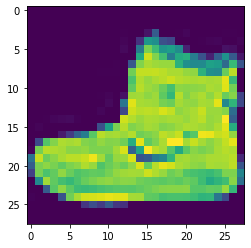

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [36]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])
plt.show()
print(training_images[0])
print("label: ", training_labels[0])

In [37]:
#normalization
training_images = training_images/255
test_images = test_images/255

In [38]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation=tf.nn.relu),
                             tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [39]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss')<0.1):
            print('\nLoss is low so canceling training!')
            self.model.stop_training = True

In [41]:
callbacks = myCallback()
model.fit(training_images, training_labels, epochs=100, batch_size=128, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 25us/sample - loss: 0.5464 - accuracy: 0.8129
Epoch 2/100
60000/60000 [==============================] - 1s 24us/sample - loss: 0.4052 - accuracy: 0.8572
Epoch 3/100
60000/60000 [==============================] - 1s 22us/sample - loss: 0.3575 - accuracy: 0.8735
Epoch 4/100
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3315 - accuracy: 0.8806
Epoch 5/100
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3152 - accuracy: 0.8864
Epoch 6/100
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3003 - accuracy: 0.8918
Epoch 7/100
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2885 - accuracy: 0.8952
Epoch 8/100
60000/60000 [==============================] - 1s 21us/sample - loss: 0.2763 - accuracy: 0.8992
Epoch 9/100
60000/60000 [==============================] - 1s 20us/sample - loss: 0.2674 - accuracy: 0.9013
Epoch

In [42]:
model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.4267223403811455, 0.8855]